<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/hpdp/ZProMax/case_study1/cs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flow of patients in/out of Covid-19 Quarantine and Treatment Centres (PKRC), with capacity and utilisation**

This project is about an exploratory data analysis (EDA) on the PKRC of Covid-19 Per State using Python. The dataset [```pkrc.csv```](https://github.com/MoH-Malaysia/covid19-public/blob/main/epidemic/pkrc.csv) is basically regarding the flow of patients to/out of Covid-19 Quarantine and Treatment Centres (PKRC), with capacity and utilisation. This dataset was sourced from the repositories associated with MoH Malaysia github account. We used Pandas, Numpy, Seaborn, Matplolib and Plotly to process, clean, analyze, and visualize the data.


#### Group Members:
| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| NG SUANG JOO | A21EC0102 | Case Study 1, 2a  
| LING WAN YIN | A21EC0047 | Case Study 1, 2b
| FONG KHAH KHEH | A21EC0026 | Case Study 1, 2c



## **Downloading the Dataset**

The dataset can be retrieved from [GitHub](https://github.com/MoH-Malaysia/covid19-public/blob/main/epidemic/pkrc.csv)
<br><br>


**Dataset descriptions**
- This dataset contains a total of 10,000 records and 12 columns.

|Attribute|Description|
|:--------|:----------|
|`date`|yyyy-mm-dd format; data correct as of 2359hrs on that date|
|`state`|Name of the state|
|`beds`|Total PKRC beds (with related medical infrastructure)|
|`admitted_x`|Number of individuals in category x admitted to PKRCs, where x can be suspected/probable, COVID-19 positive, or non-COVID|
|`discharged_x`|Number of individuals in category x discharged from PKRCs|
|`pkrc_x`|Total number of individuals in category x in PKRCs|



## **Data Preparation and Cleaning**

Perform data cleansing before moving on to data analysis, such as determining whether any missing values exist and adding a specific column to make the analysis process easier.


In [ ]:
# @title Import pandas and numpy library
import pandas as pd
import numpy as np

In [ ]:
# @title Read the dataset
url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/pkrc.csv'
dataset = pd.read_csv(url)

In [ ]:
# @title Load the dataset into a Pandas Data Frame
df = pd.DataFrame(dataset)
display(df)

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid
0,2020-03-28,Kelantan,147,0,0,0,0,0,0,0,53,0
1,2020-03-28,Perlis,54,0,0,0,0,0,0,8,3,0
2,2020-03-28,Pulau Pinang,58,0,0,0,0,0,0,13,0,0
3,2020-03-28,Sarawak,74,0,0,0,0,0,0,22,0,0
4,2020-03-28,Selangor,1452,0,12,12,0,5,5,145,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-11-27,Sabah,15,0,0,0,0,14,14,0,0,0
9996,2022-11-28,Sabah,15,0,0,0,0,0,0,0,0,0
9997,2022-11-29,Sabah,15,0,0,0,0,0,0,0,0,0
9998,2022-11-30,Sabah,15,0,0,0,0,0,0,0,0,0


To know the number of rows and columns:

In [ ]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (10000, 12)


To know the column name:

In [ ]:
print("Column names:", df.columns)

Column names: Index(['date', 'state', 'beds', 'admitted_pui', 'admitted_covid',
       'admitted_total', 'discharged_pui', 'discharged_covid',
       'discharged_total', 'pkrc_covid', 'pkrc_pui', 'pkrc_noncovid'],
      dtype='object')


To know the type of data

In [ ]:
print("Data types of columns:", df.dtypes)

Data types of columns: date                object
state               object
beds                 int64
admitted_pui         int64
admitted_covid       int64
admitted_total       int64
discharged_pui       int64
discharged_covid     int64
discharged_total     int64
pkrc_covid           int64
pkrc_pui             int64
pkrc_noncovid        int64
dtype: object


Range of values:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              10000 non-null  object
 1   state             10000 non-null  object
 2   beds              10000 non-null  int64 
 3   admitted_pui      10000 non-null  int64 
 4   admitted_covid    10000 non-null  int64 
 5   admitted_total    10000 non-null  int64 
 6   discharged_pui    10000 non-null  int64 
 7   discharged_covid  10000 non-null  int64 
 8   discharged_total  10000 non-null  int64 
 9   pkrc_covid        10000 non-null  int64 
 10  pkrc_pui          10000 non-null  int64 
 11  pkrc_noncovid     10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


To handle missing value:

In [ ]:
df.isnull().sum()

date                0
state               0
beds                0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
pkrc_covid          0
pkrc_pui            0
pkrc_noncovid       0
dtype: int64

Since there is no missing value, lets find if there is any ambiguous in the **State** column

In [ ]:
df['state'].unique()

array(['Kelantan', 'Perlis', 'Pulau Pinang', 'Sarawak', 'Selangor',
       'W.P. Labuan', 'Perak', 'Johor', 'Negeri Sembilan', 'Sabah',
       'Melaka', 'Pahang', 'Kedah', 'Terengganu', 'W.P. Kuala Lumpur',
       'W.P. Putrajaya'], dtype=object)

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
display(df)

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid,year
0,2020-03-28,Kelantan,147,0,0,0,0,0,0,0,53,0,2020
1,2020-03-28,Perlis,54,0,0,0,0,0,0,8,3,0,2020
2,2020-03-28,Pulau Pinang,58,0,0,0,0,0,0,13,0,0,2020
3,2020-03-28,Sarawak,74,0,0,0,0,0,0,22,0,0,2020
4,2020-03-28,Selangor,1452,0,12,12,0,5,5,145,0,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-11-27,Sabah,15,0,0,0,0,14,14,0,0,0,2022
9996,2022-11-28,Sabah,15,0,0,0,0,0,0,0,0,0,2022
9997,2022-11-29,Sabah,15,0,0,0,0,0,0,0,0,0,2022
9998,2022-11-30,Sabah,15,0,0,0,0,0,0,0,0,0,2022


## **Exploratory Analysis and Visualization**

Exploratory Data Analysis (EDA) is an essential phase in the data analysis process that allows us to comprehend the primary characteristics, relationships, and patterns of the data. In this steps, we utilize `matplotlib.pyplot` and `seaborn` library.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Compute the mean, sum, std, range, min and max

In [ ]:
df.describe()

,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid,year
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1338.990000,2.57790,72.765600,75.343500,2.071700,72.381600,74.453300,530.982200,23.166300,14.399100,2020.963100
std,1772.649585,9.47227,148.954233,151.067924,8.561757,148.302091,150.121712,932.441901,84.787546,38.322587,0.698704
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
25%,189.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,2020.000000
50%,709.000000,0.00000,17.000000,19.000000,0.000000,17.000000,18.000000,138.000000,0.000000,0.000000,2021.000000
75%,1690.000000,1.00000,78.000000,81.000000,1.000000,78.000000,81.000000,576.000000,9.000000,0.000000,2021.000000
max,11345.000000,190.00000,2040.000000,2042.000000,305.000000,2278.000000,2278.000000,6685.000000,1079.000000,884.000000,2022.000000


Based on the descriptive statistics shown above, there are a total of 10000 records for every numeric field. It shows that not every day there is a flow of patients in and out of COVID-19 Quarantine and Treatment Centers (PKRC) since there is a minimum value of 0 for every field. The pkrc_covid recorded the highest mean among pkrc_pui and pkru_noncovid, which means the majority of individuals admitted and discharged from PKRC are because of COVID. The maximum number of beds available is 11345 for a particular date.

#### **Horizontal bar chart - Total Discharged Beds by State**

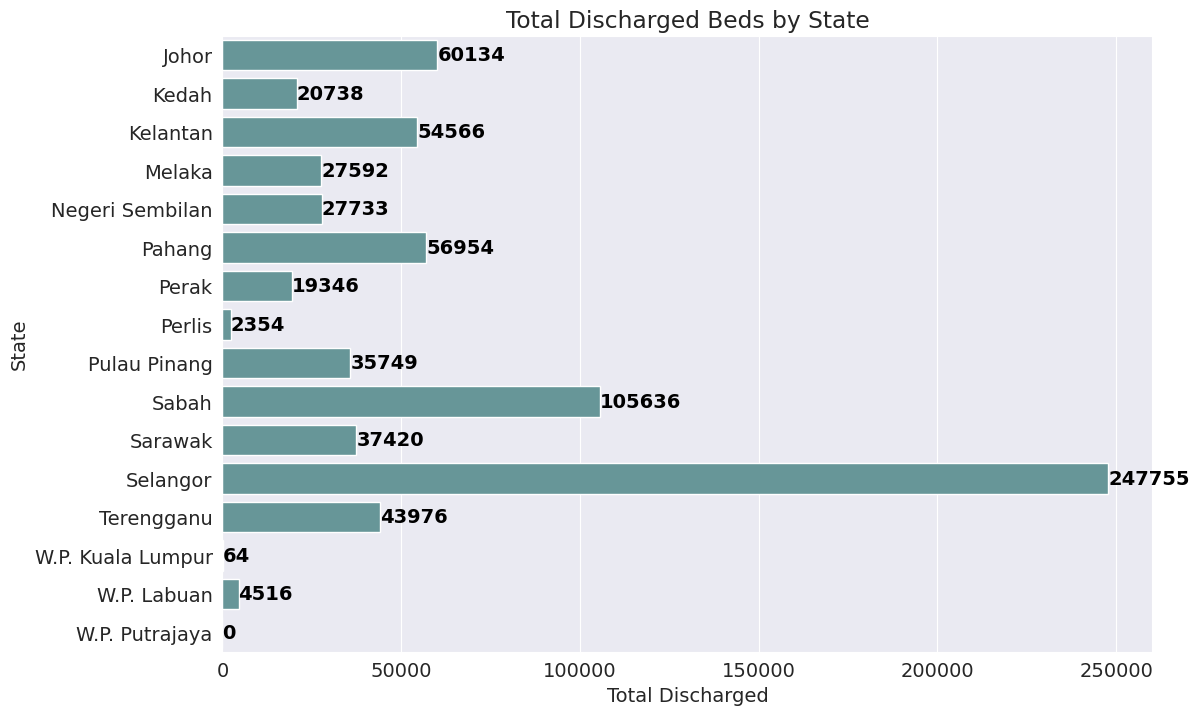

In [ ]:
# Sum the total discharged beds for each state
sum_discharged_order = df.groupby('state')['discharged_total'].sum().reset_index()

# Set the plot with appropriate dimensions
fig, ax = plt.subplots(figsize=(12, 8))

# Create the barplot
sns.barplot(data=sum_discharged_order, x="discharged_total", y="state", color="cadetblue", ax=ax)

for i, v in enumerate(sum_discharged_order["discharged_total"]):
    ax.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

# Set the chart title and label for the x-axis and y-axis
ax.set_title("Total Discharged Beds by State")
ax.set_xlabel("Total Discharged")
ax.set_ylabel("State")

# Display the plot
plt.show()

**Interesting Insights**
>As shown by the bar chart above, Selangor has the greatest overall number of bed discharges. This is presumably because Selangor has a higher population and experiences a higher prevalence of COVID-19 cases due to more patients' admission and discharge from the COVID-19 Quarantine and Treatment Centers (PKRC) compared to other states.

#### **Line plot - Number of Individuals Admitted Covid per Year in each State**

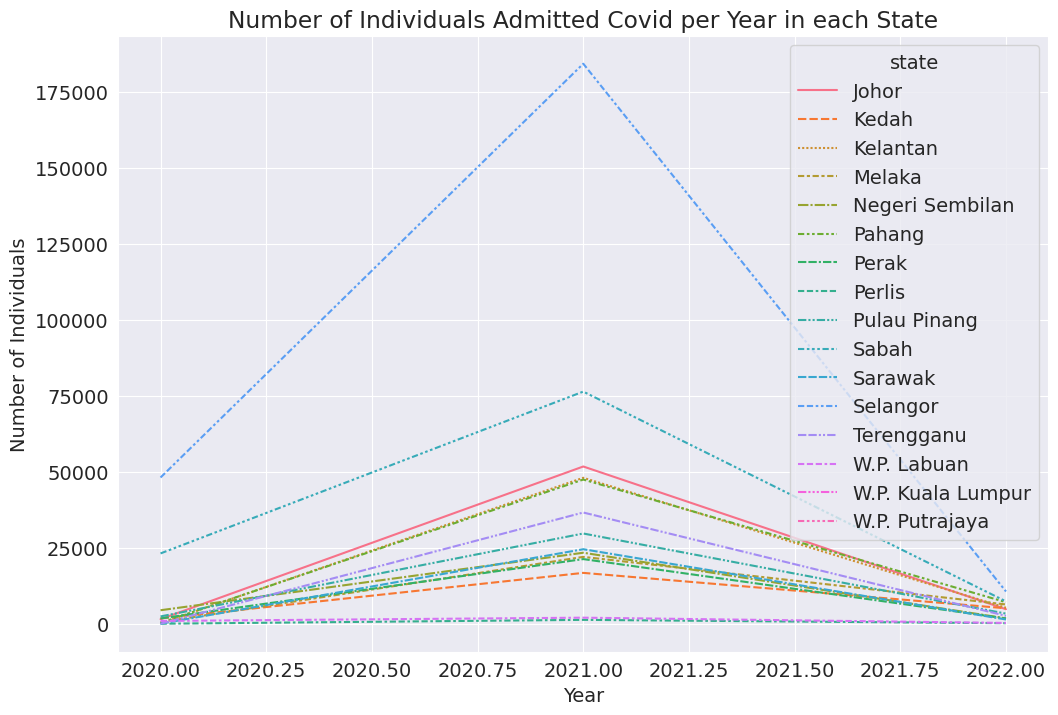

In [ ]:
# Set the plot with appropriate dimensions
plt.figure(figsize=(12,8))

admitted_covid_by_year = df.groupby(['year','state'], as_index=False)['admitted_covid'].sum()

sns.lineplot(data = admitted_covid_by_year, x ='year', y='admitted_covid', hue='state', style='state')

# Set the plot title and label for the x-axis and y-axis
plt.title('Number of Individuals Admitted Covid per Year in each State')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')

# Display the plot
plt.show()

### **Pie chart - Average PUI admission**

In [ ]:
# Group the DataFrame 'df' by the 'year' column and calculate the mean of 'admitted_pui' for each year
pui_admission = df.groupby('year',).apply(lambda x: x['admitted_pui'].mean()).reset_index(name= "Avg. PUI admission per day")

# Rename the 'year' column to 'Year'
pui_admission = pui_admission.rename(columns={'year': 'Year'})

# Round the values in the 'Avg. PUI admission per day' column to the nearest whole number
pui_admission=pui_admission.round(0)

# Set the display precision for the DataFrame to show rounded values
pd.set_option('display.precision',0)

# Display the DataFrame 'pui_admission'
pui_admission

,Year,Avg. PUI admission per day
0,2020,1
1,2021,4
2,2022,1


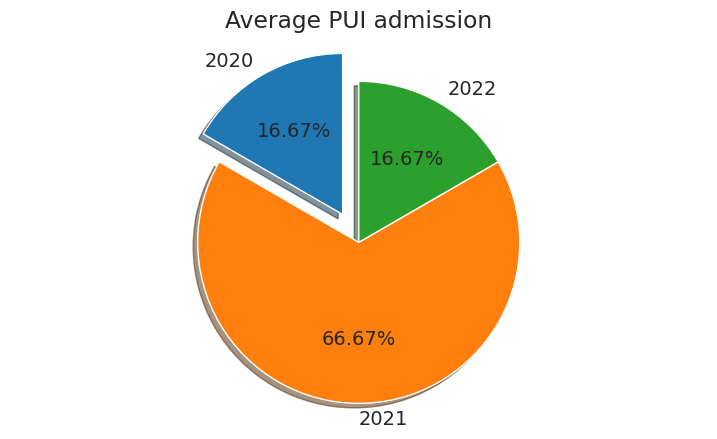

In [ ]:
# Retrieve the 'Year' column from 'pui_admission' DataFrame and use it as the pie chart labels
labels = pui_admission['Year']

# Extract the 'Avg. PUI admission per day' column from the DataFrame 'pui_admission' as data for the pie chart
part = pui_admission['Avg. PUI admission per day']

# Specify the array 'myexplode'
myexplode = [0.2, 0, 0]

# Create a pie chart using Matplotlib
plt.pie(part, labels=labels,
        startangle=90,
        autopct = '%1.2f%%', explode = myexplode, shadow = True)

# Set the aspect ratio of the pie chart
plt.axis('equal')

# Set the title for the pie chart
plt.title('Average PUI admission')

# Display the pie chart
plt.show()

**Interesting Insights**
>As shown by the pie chart above, 2021 contributes the highest percentage of average PUI admission, with 4 per day, resulting in 66.67% of overall PUI admission in three years.

#### **Bar plot - Total Discharge Cases per Year**

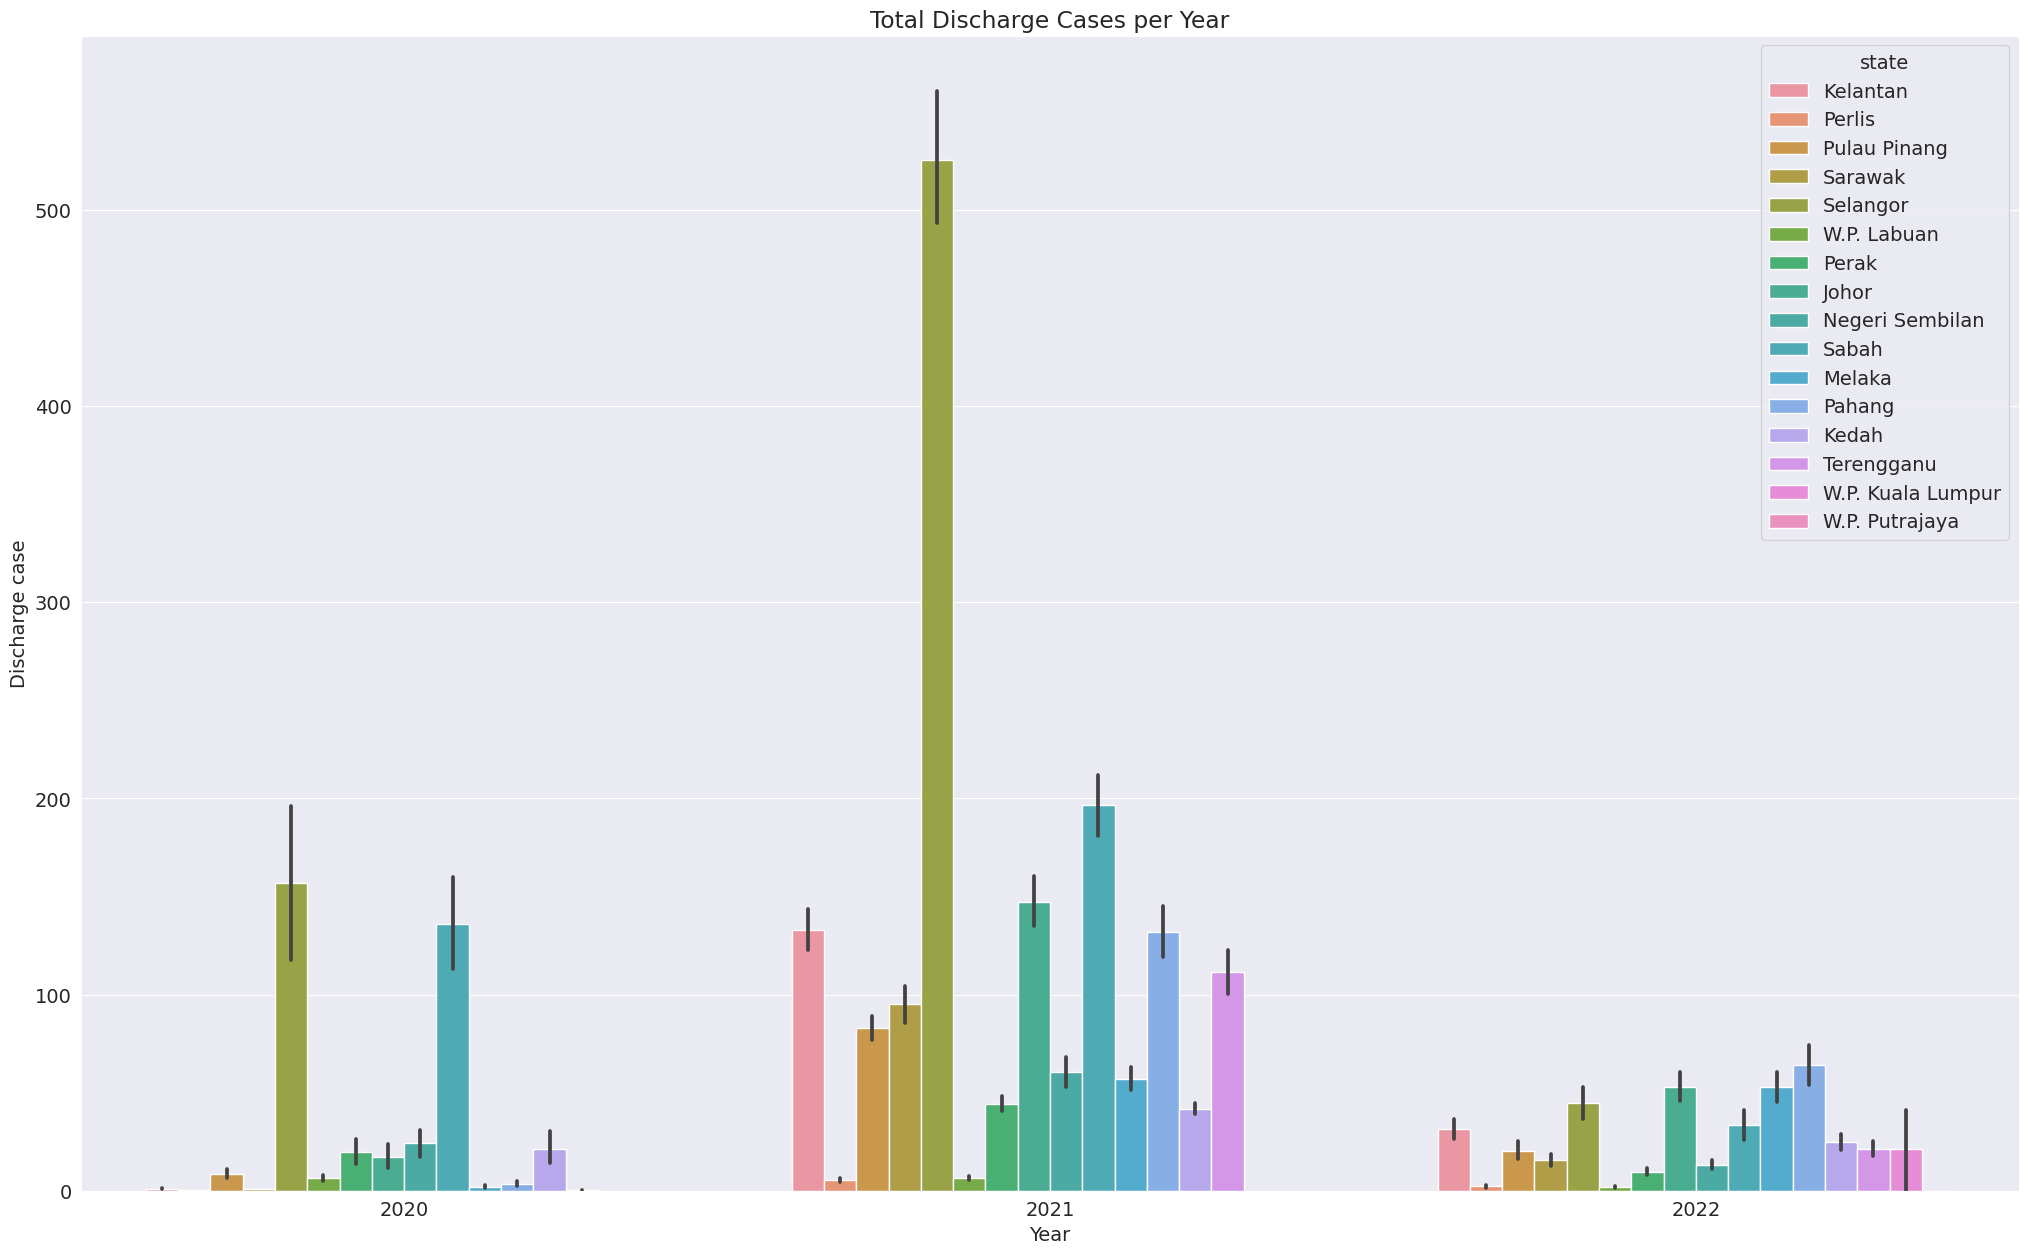

In [ ]:
# Set the plot with appropriate dimensions
fig, ax = plt.subplots(figsize=(25, 15))

# Create a bar plot using Seaborn
sns.barplot(x = "year", y = "discharged_total", hue = "state", data = df)

# Set the plot title and label for the x-axis and y-axis
plt.title('Total Discharge Cases per Year')
plt.xlabel('Year')
plt.ylabel('Discharge case')

# Display the bar plot
plt.show()

**Interesting Insights**
>The bar plot above demonstrates the total discharge from COVID-19 Quarantine and Treatment Centers (PKRC) in every state in Malaysia. It highlights the difference in the total discharge number from PKRC in each state in those three years (2020, 2021, 2022).

>In three years, it shows that Perlis has the unexpectedly lowest discharge number. There are a few possible explanations for this, including the smaller population or healthcare system practices in Perlis that could affect discharge number.

>One factor that is undeniably obvious is the emergence of the COVID-19 pandemic in the year 2021. Globally, the number of discharge number increased due to the COVID-19 pandemic, which probably impacted every state in Malaysia, including Perlis. More people could be admitted to quarantine centers as a result of higher infection rates, which would lead to a higher discharge number compared to previous years.



## **Asking and Answering Questions**

In this part, we are going to ask and answer ten questions regarding the data to further understanding the data.



####**Q1: What month has the highest number of beds available in year 2021?**

In [ ]:
# Create a new column named month
df['month'] = pd.DatetimeIndex(df['date']).month

# Filter the records with year 2021
months = df.loc[df.year == 2021, ['beds','month']]

# Find the maximum number of beds in each month and sort it by column beds in descending order
highest_beds_avail = months.groupby('month').beds.max().reset_index(name='Beds').sort_values(by ='Beds', ascending= False)

# Rename the column month to Month
highest_beds_avail = highest_beds_avail.rename(columns={'month': 'Month'})

# Display the first record
highest_beds_avail.head(1)

,Month,Beds
0,1,11345


**Description**

>According to the DataFrame above, the month that has the highest number of beds available in year 2021 is month 1.

#### **Q2: What is the distribution of patients in PKRC (Quarantine Centers) based on COVID status?**

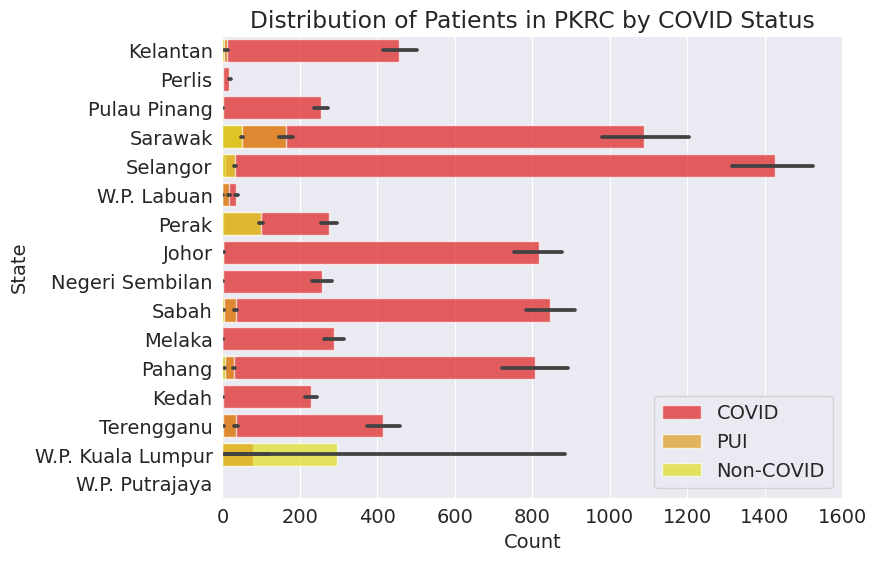

In [ ]:
# Set the figure dimensions
plt.figure(figsize=(8, 6))

# Create a bar plot for Covid
sns.barplot(x='pkrc_covid', y='state', data=df, label='COVID',color='red', alpha=0.7)

# Create a bar plot for PUI
sns.barplot(x='pkrc_pui', y='state', data=df, label='PUI',color='orange', alpha=0.7)

# Create a bar plot for NonCovid
sns.barplot(x='pkrc_noncovid', y='state', data=df, label='Non-COVID',color='yellow', alpha=0.7)

# Set title and label for the x-axis and y_axis
plt.title('Distribution of Patients in PKRC by COVID Status')
plt.xlabel('Count')
plt.ylabel('State')

# Display the legends to differentiate each colour representing
plt.legend()

# Display the plot
plt.show()

**Description**

>From the bar plot above, it shows that patients that are admitted to the PKRC in every state are mostly patients that are infected with COVID, except in W.P. Kuala Lumpur and W.P. Putrajaya. Different from other states, the flow and discharge of patients from Covid-19 Quarantine and Treatment Centres (PKRC) in W.P. Kuala Lumpur are mostly composed of non-covid patients compared to other states in which admission and discharge from PKRC are due to covid infections.

#### **Q3: How does the distribution of discharged COVID patients in Selangor vary across months?**

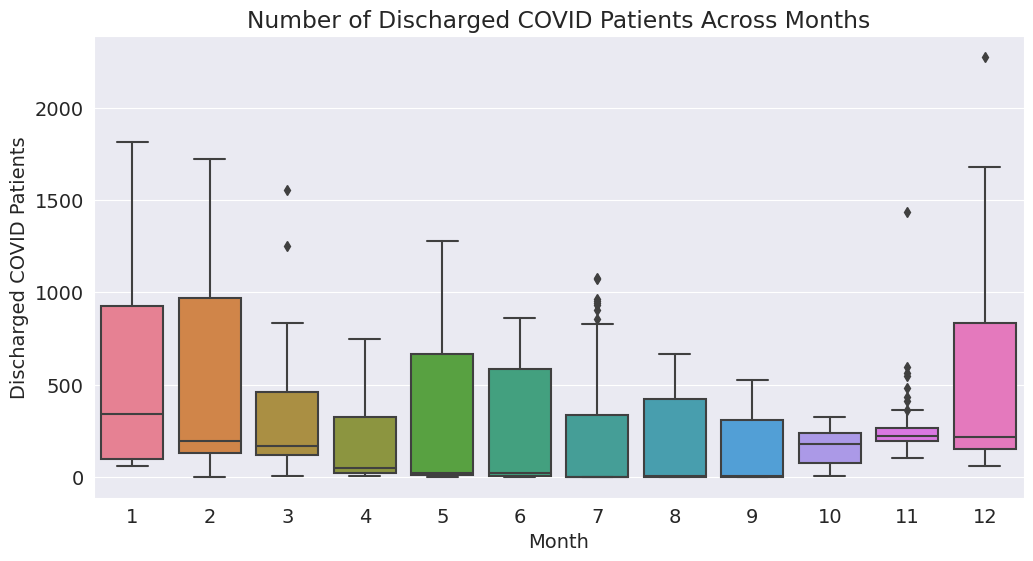

In [ ]:
# Set the figure dimensions
plt.figure(figsize=(12, 6))

# Filter records with state 'Selangor'
selangor_data = df[df['state'] == 'Selangor']

# Create a boxplot for discharged covid
sns.boxplot(x='month', y='discharged_covid', data=selangor_data, palette='husl')

# Set the title and label for the x-axis and y-axis
plt.title('Number of Discharged COVID Patients in Selangor Across Months')
plt.xlabel('Month')
plt.ylabel('Discharged COVID Patients')

# Display the plot
plt.show()

**Description**

>Based on the box plot above, there are outliers in a certain month since the number of discharged COVID patients in a certain month is varied. To be specific, the higher median in month 1 indicates that, on average, more COVID patients were discharged compared to month 2. This suggests that the higher number of COVID patients discharged in month 1 is greater than in month 2. The higher upper quartile in month 2 indicates greater variability or a wider spread of discharged cases. The efficacy of the immunization may be the reason for this, which will affect the rate of recovery.

#### **Q4.What is the trend in the COVID-19 discharge rate over month?**

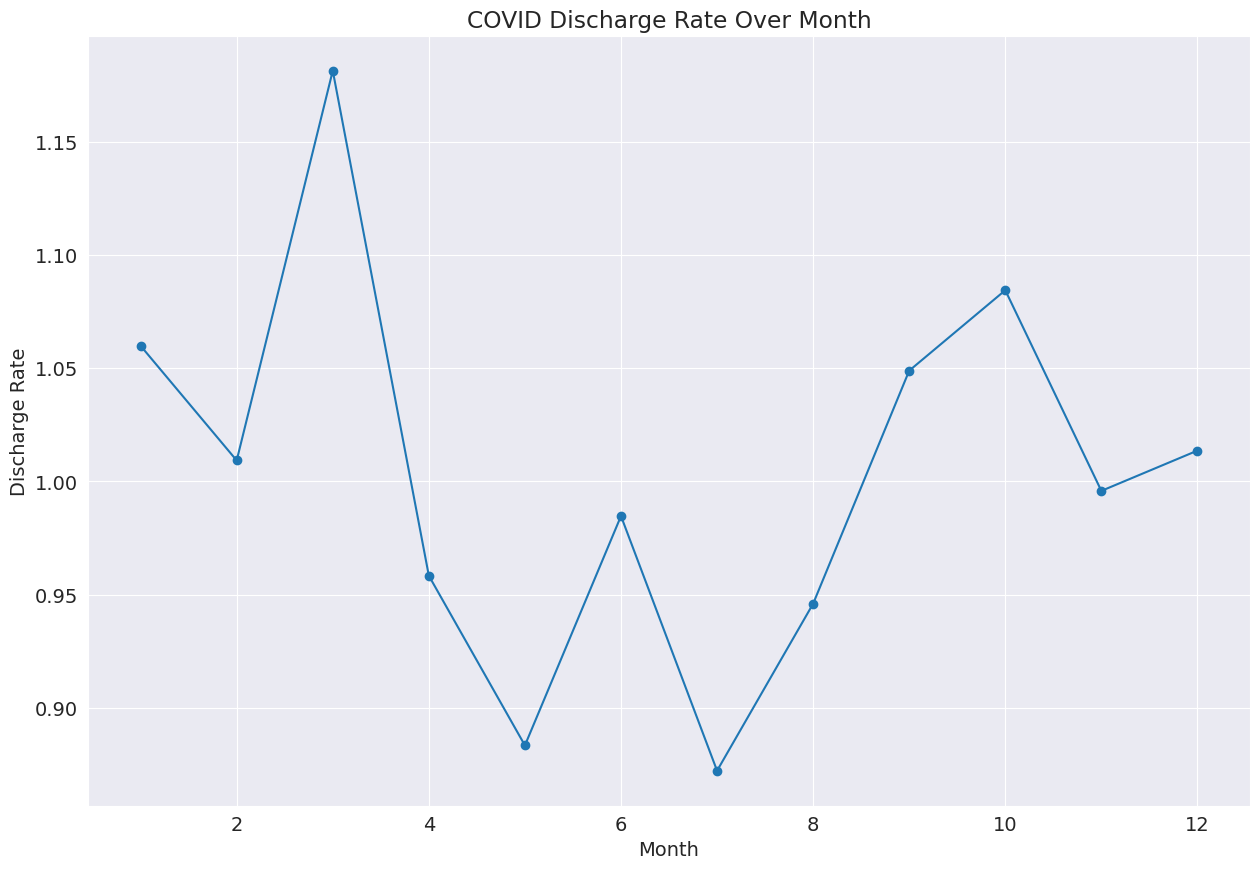

In [ ]:
# Set the figure dimensions
plt.figure(figsize=(15, 10))

# Calculate the COVID discharge rate by grouping the DataFrame 'df' by 'month' and taking the sum of 'discharged_covid' divided by the sum of 'admitted_covid' for each month
covid_discharge_rate = df.groupby('month')['discharged_covid'].sum() / df.groupby('month')['admitted_covid'].sum()

# Plot the COVID discharge rate using a line plot
covid_discharge_rate.plot(marker='o')

# Set the title and label for the x-axis and y-axis
plt.title('COVID Discharge Rate Over Month')
plt.xlabel('Month')
plt.ylabel('Discharge Rate')

# Display the plot
plt.show()

**Description**
>Based on the line chart above, it shows that there was a significant jump in the COVID discharge rate in month 3, which then settled down in month 5. But a COVID wave was detected in month 6, and later even more severe in month 10.

#### **Q5: How many individuals stayed in PKRC_covid and PKRC_pui per year?**

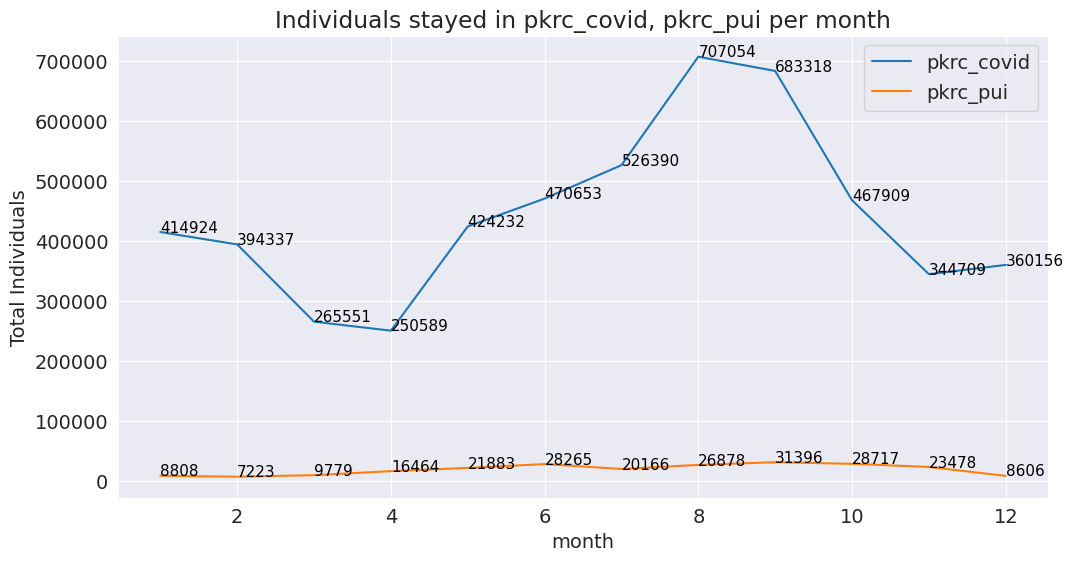

In [ ]:
# Set the figure dimensions
plt.figure(figsize=(12, 6))

# Group the DataFrame by month and sum the total number of individuals in PKRC for COVID and PUI
total_num_covid = df.groupby(['month'], as_index=False)['pkrc_covid'].sum()
total_num_pui = df.groupby(['month'], as_index=False)['pkrc_pui'].sum()

# Plot a line for the total number of individuals in PKRC due to COVID and PUI
sns.lineplot(data = total_num_covid, x ='month', y='pkrc_covid', label='pkrc_covid')
sns.lineplot(data = total_num_pui, x ='month', y='pkrc_pui', label='pkrc_pui')

# Set the title and label for the x-axis and y-axis
plt.title('Individuals stayed in pkrc_covid, pkrc_pui per month')
plt.xlabel('month')
plt.ylabel('Total Individuals')

for x, y in zip(total_num_covid['month'], total_num_covid['pkrc_covid']):
  plt.text(x = x, y = y+10, s = '{:.0f}'.format(y), color = 'black', size = 11)

for x, y in zip(total_num_pui['month'], total_num_pui['pkrc_pui']):
  plt.text(x = x, y = y+10, s = '{:.0f}'.format(y), color = 'black', size = 11)


**Description**

>Based on the line chart above, there is a significant differences between the number of individuals stayed in PKRC Covid and PKRC PUI (Person under Investigation).

#### **Q6: What is the correspondence between the column?**

<ipython-input-71-554b90b7a78e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),cmap='coolwarm')


Text(0.5, 1.0, 'Correlations')

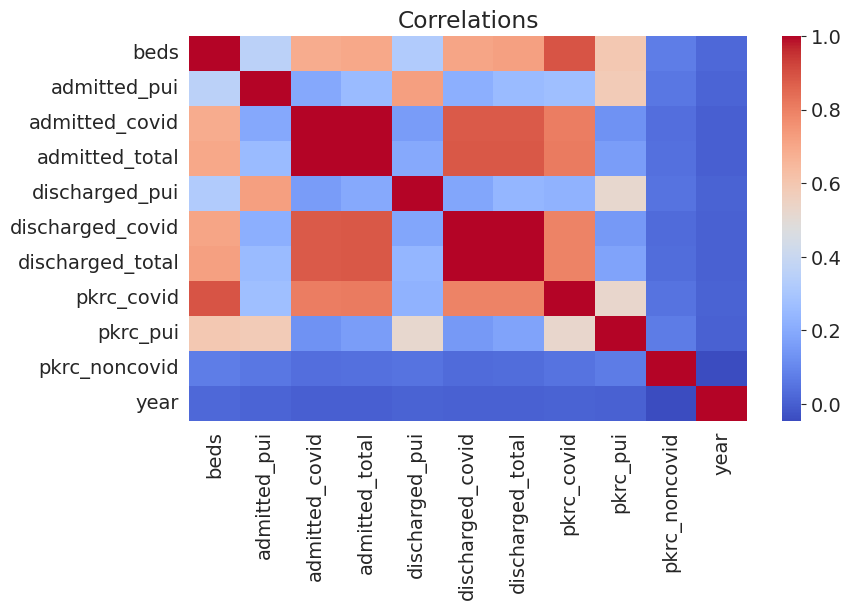

In [ ]:
# Create a heatmap of the correlation matrix of the dataset
sns.heatmap(dataset.corr(),cmap='coolwarm')

# Set the title for the plot
plt.title('Correlations')

**Description**

>The darker the colors of the cells, the higher the two columns correspond to each other.

**Q7. What is the average and maximum utilization of beds in PKRC for COVID and non-COVID cases?**


In [ ]:
# Computing the mean and max bed utilization for COVID
average_bed_utilization_covid = df['beds'].mean()
max_bed_utilization_covid = df['beds'].max()

# Computing the mean and max bed utilization for PUI
average_bed_utilization_pui = df['admitted_pui'].mean()
max_bed_utilization_pui = df['admitted_pui'].max()

# Display the mean and max bed utilization for COVID and PUI
print(f'Average Bed Utilization (COVID): {average_bed_utilization_covid:.2f}')
print(f'Maximum Bed Utilization (COVID): {max_bed_utilization_covid}')

print()
print(f'Average Bed Utilization (PUI): {average_bed_utilization_pui:.2f}')
print(f'Maximum Bed Utilization (PUI): {max_bed_utilization_pui}')


Average Bed Utilization (COVID): 1338.99
Maximum Bed Utilization (COVID): 11345

Average Bed Utilization (PUI): 2.58
Maximum Bed Utilization (PUI): 190


**Description**
> The average and maximum bed utilization for COVID is 1338.99 and 11345 respectively whereas the average and maximum bed utilization for PUI is 2.58 and 190 respectively.


**Q8. What is the maximum beds available per state in 2021?**

In [ ]:
max_beds_per_state = df[df['year']==2021].groupby('state')['beds'].max()
max_beds_per_state_sorted = max_beds_per_state.sort_values(ascending=True)

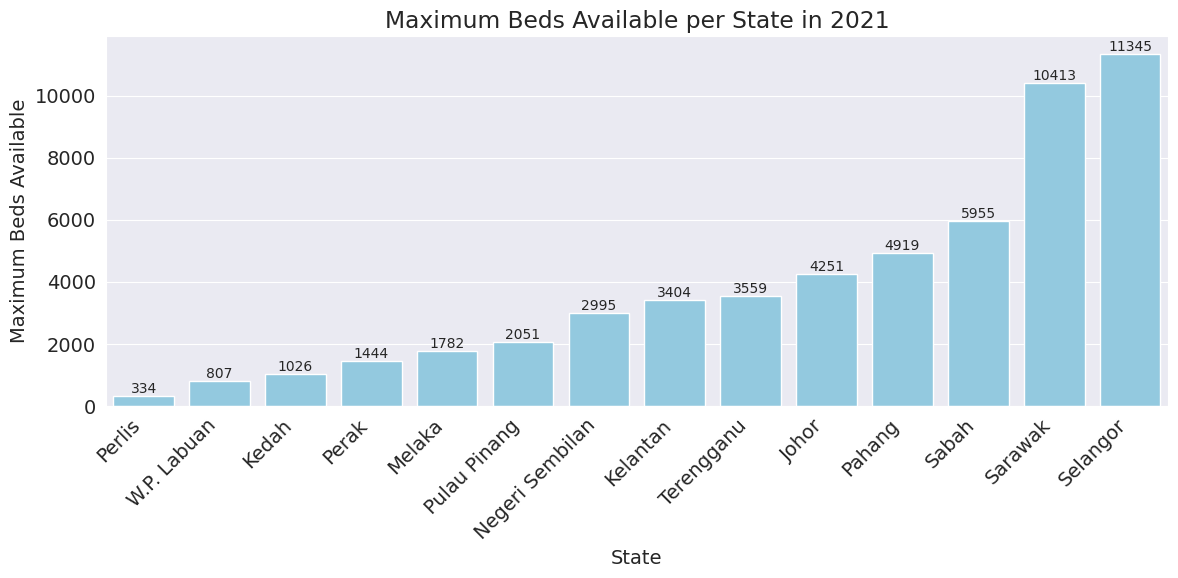

In [ ]:
# Set the figure dimensions
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x=max_beds_per_state_sorted.index, y=max_beds_per_state_sorted, color='skyblue')

# Insert labels with the values on top of each bar
ax.bar_label(ax.containers[0], fontsize=10);

# Set the title and label for the x-axis and y-axis
plt.title('Maximum Beds Available per State in 2021')
plt.xlabel('State')
plt.ylabel('Maximum Beds Available')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# # Adjust layout for better presentation
plt.tight_layout()

# Display the plot
plt.show()

**Description**

>Selangor has the highest maximum beds available, with a value of 11345 compared to other states.

**Q9: Is there any correlation between the number of beds and the total admitted cases?**

Correlation between Beds and Total Admitted Cases: 0.6987970277302676


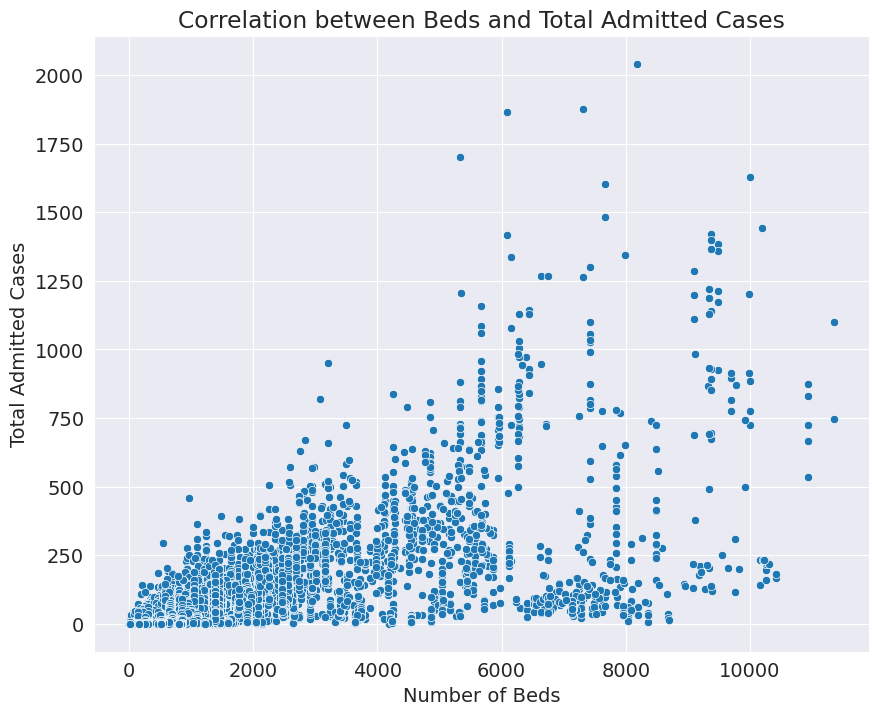

In [ ]:
correlation_beds_admitted = df['beds'].corr(df['admitted_total'])
print("Correlation between Beds and Total Admitted Cases:", correlation_beds_admitted)

# Set the figure dimensions
plt.figure(figsize=(10, 8))

# Create the scatterplot
sns.scatterplot(x='beds', y='admitted_total', data=df)

# Set the title and label for the x-axis and y-axis
plt.title('Correlation between Beds and Total Admitted Cases')
plt.xlabel('Number of Beds')
plt.ylabel('Total Admitted Cases')

# Display the plot
plt.show()

**Description**

>The analysis showed a strong positive correlation (r = 0.70) between the number of available beds and the total number of admissions in each state. This indicates that as the number of beds in Patient Under Surveillance (PUI) and COVID-19 designated facilities increases, there is a corresponding increase in the total number of admissions. The correlation coefficient of 0.70 indicates a significant linear relationship, highlighting the importance of adequate bed capacity in handling patient admissions. Understanding this correlation is crucial for healthcare resource planning and management, emphasizing the need for adequate bed infrastructure to accommodate potential increases in admissions during the ongoing pandemic.

**Q10: Over the recorded months, does the number of discharged COVID cases eventually catch up with or surpass the number of admitted COVID cases?**

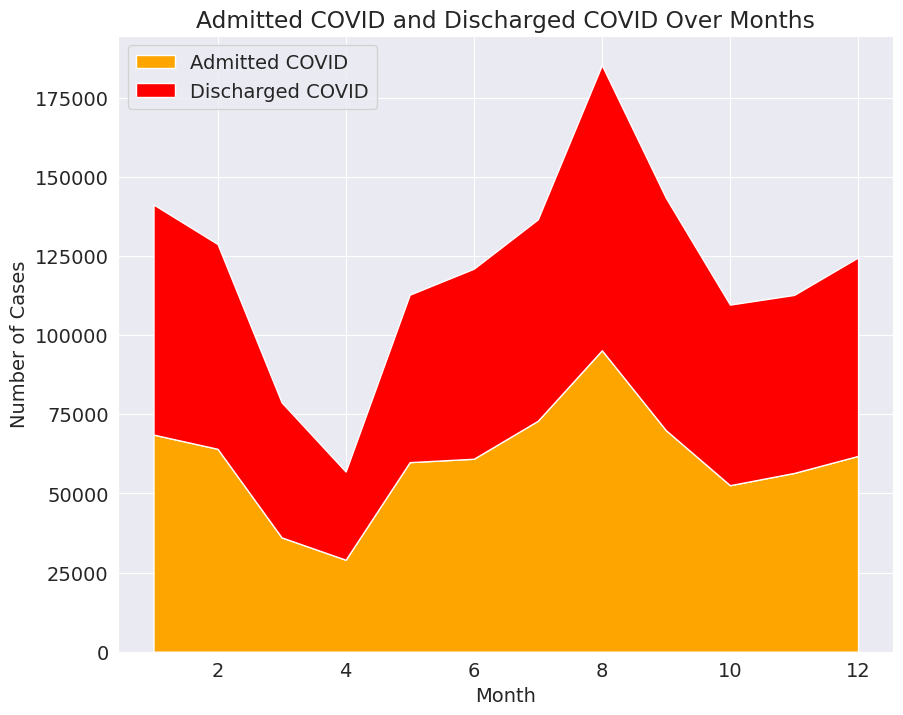

In [ ]:
# Extract relevant columns for the stack plot
stack_data = df[['admitted_covid', 'discharged_covid', 'month']].groupby('month').sum()

# Create the stack plot
plt.figure(figsize=(10, 8))
plt.stackplot(stack_data.index, stack_data['admitted_covid'], stack_data['discharged_covid'],
              labels=[ 'Admitted COVID', 'Discharged COVID'], colors=['orange', 'red'])

# Set the title and label for the x-axis and y-axis
plt.title('Admitted COVID and Discharged COVID Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Cases')

# Set the postion of the legend
plt.legend(loc='upper left')

# Display the plot
plt.show()

**Description**

>As shown in the stack plot above, the number of discharged COVID cases surpasses the number of admitted COVID cases every month without fail.

## **Inferences and Conclusion**

As summary, Selangor has the most number of PKRC admission due to COVID. Despite that, the number of beds available allows it to handle the rising admissions due to either PUI or COVID. It can be concluded that Selangor is a densely populated state, and the Covid-19 Quarantine and Treatment Centers (PKRC) in Selangor are large enough to accommodate all of the patients. Year 2021 is proved to be peak period for the COVID infections as the average PUI admission in 2021 is the highest with 4 admissions per day.



## **References and Future Work**

**Future Work:**

Considering this dataset, several number of possible future projects could be carried out, such as:

*   **Predictive modeling**

    Create machine learning models based on past data to predict future PKRC admissions. The planning and distribution of resources in healthcare can benefit from this.
<br>
*   **Comparison Study**

    Analyze capacity and utilization statistics for PKRCs in various states or areas. Determine the trends, distinctions, and elements influencing usage fluctuations.
<br>
* **Public Health Measures**

   Evaluate how vaccination campaigns, social distancing measures, and other public health interventions impact the PKRC admission. Examine how well these steps worked to stop the communicable virus spread, preserve public health, and provide guidance for upcoming public health initiatives.
<br>

**References:**
1. [Seaborn website](https://seaborn.pydata.org/)
2. [A Complete Guide to Data Visualization in Python With Libraries & More](https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python)